In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import laplace

In [2]:
def get_E_data():
    return [10, 1.5, 1, 8, 1.2, 0.9, 9.2]

def plot_E(ax, color):
    E_data = get_E_data()
    ax.barh(
        range(len(E_data)), E_data,
        color=color,
        height=0.85,  # 0.93
        align='edge',
    )
    ax.set_ylim(-0.1, len(E_data) + 0.1)
    ax.set_ylim(0, len(E_data))
    ax.invert_yaxis()  # Reorder top-to-bottom
    return ax

def get_K_data():
    rv = laplace(loc=0, scale=2)
    x_K = np.linspace(
        rv.ppf(0.01), rv.ppf(0.99), 100
    )
    y_K = rv.pdf(x_K)
    y_K = max(y_K) - y_K
    return x_K, y_K

def plot_K(ax, color):
    x_K, y_K = get_K_data()
    ax.plot(
        y_K, x_K,
        color=color,
        lw=10,
    )
    ax.set_xlim(0, None)
    ax.set_ylim(x_K.min(), x_K.max())
    return ax

def remove_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # ax.spines['bottom'].set_linewidth(2)
    # ax.spines['left'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    # ax.tick_params(
    #     axis="both", which="both", 
    #     bottom=False, left=False,
    # )
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

def plot_logo(text_color, fig=None):
    if fig is None:
        fig = plt.figure();
    eax, kax = fig.subplots(1, 2)
    plot_E(eax, text_color)
    plot_K(kax, text_color)
    remove_frame(eax)
    remove_frame(kax)
    fig.subplots_adjust(wspace=0)
    return fig

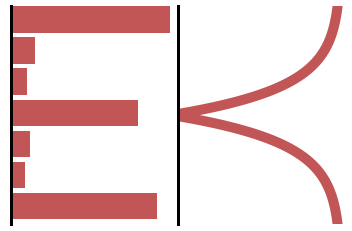

In [3]:
text_color = "#c25555"
plot_logo(text_color);

In [4]:
# plot_logo("C0");

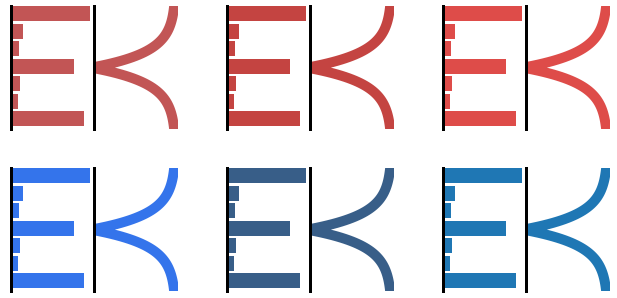

In [5]:
# print(plt.rcParams.get('figure.figsize'))
fig = plt.figure(figsize=(6*1.5, 3*1.5))
figs = fig.subfigures(2, 3, wspace=0.0, hspace=0)

plot_logo("#c25555", fig=figs[0, 0]);
plot_logo("#c44441", fig=figs[0, 1]);  # <- this?
plot_logo("#DE4C49", fig=figs[0, 2]);
plot_logo("#3474eb", fig=figs[1, 0]);
plot_logo("#385E88", fig=figs[1, 1]);  # <- this?
plot_logo("C0", fig=figs[1, 2]);
# fig

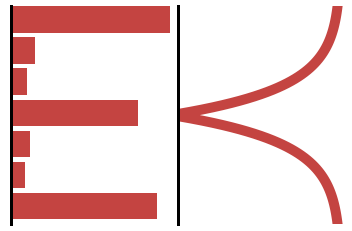

In [6]:
fig = plot_logo("#c44441")
fig.savefig("eklogo-light.svg")

In [7]:
def darkify(fig, white_spines=False):
    # fig = plot_logo("#c44441")
    fig.set_facecolor("black")
    fig.axes[0].set_facecolor("black")
    fig.axes[1].set_facecolor("black")
    if white_spines:
        fig.axes[0].spines['left'].set_color("white")
        fig.axes[1].spines['left'].set_color("white")
    return fig
fig = darkify(fig)
fig.savefig("eklogo-dark.svg")